In [1]:
import numpy as np
import math
import matplotlib

import matplotlib.pyplot as plt
import glob
import time

from ipywidgets import IntProgress
from IPython.display import display
import re

In [2]:
#Set latex environment for plots/labels
# matplotlib.rc('font', **{'family': 'serif'})
matplotlib.rc('text', usetex=False)
matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
plt.rcParams.update({'font.family':'serif'})


fl=22
fm=18
fs=16

In [3]:
# this is just a little function that we will use to make the plot more beautiful (bigger ticks, labels)
# However, you do not have to use this (just uncommoment "layoutAxes" everywhere)
from matplotlib.ticker import (FormatStrFormatter,
                               AutoMinorLocator)

def layoutAxes(ax, nameX='', nameY='', \
               labelSizeMajor = 10, fontsize = 18, second=False, labelpad=None, setMinor=True):
    """
    Tiny code to do the layout for axes in matplotlib
    """
    tickLengthMajor = 10
    tickLengthMinor = 5
    tickWidthMajor  = 1.5
    tickWidthMinor  = 1.5
    
    #rc('axes', linewidth=2)
    #label1 always refers to first axis not the twin 
    if not second:
        for tick in ax.xaxis.get_major_ticks():
            tick.label1.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
        for tick in ax.yaxis.get_major_ticks():
            tick.label1.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
    if second:
        for tick in ax.xaxis.get_major_ticks():
            tick.label2.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
        for tick in ax.yaxis.get_major_ticks():
            tick.label2.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.2)
    ax.tick_params(length=tickLengthMajor, width=tickWidthMajor, which='major')
    ax.tick_params(length=tickLengthMinor, width=tickWidthMinor, which='minor')
    ax.set_xlabel(nameX, fontsize=fontsize,labelpad=labelpad)#,fontweight='bold')
    ax.set_ylabel(nameY, fontsize=fontsize,labelpad=labelpad)#, fontweight='bold')    
    
    if setMinor==True:
        # add minor ticks:
        ax.xaxis.set_minor_locator(AutoMinorLocator())
        ax.yaxis.set_minor_locator(AutoMinorLocator())

    return ax


In [4]:
# Define the location of the posterior data
pulsar_data_loc = "../correctedPulsarPosteriors/correctedVtData"

In [5]:
# Takes about 23 s
start = time.time()

vt_all = []
pulsar_names = []

f = IntProgress(min=0, max=len(glob.glob('../correctedPulsarPosteriors/correctedVtData/*.bootstraps'))) # instantiate the bar
display(f) # display the bar

for file in glob.glob('../correctedPulsarPosteriors/correctedVtData/*.bootstraps'):
    f.value +=1
    vt_all.append(np.loadtxt(file, unpack=True, usecols=5))
    name = re.search('VtData/(.+?).corr', file).group(1)
    pulsar_names.append(name)

end = time.time()
print(end - start, "s")



IntProgress(value=0, max=81)

39.23332762718201 s


In [6]:
print(len(pulsar_names))
print(pulsar_names[10])

81
J1136+1551


In [7]:
# calculate 5th and 95th percentiles
meds = np.zeros(len(vt_all))
fifths = np.zeros(len(vt_all))
ninety_fifths = np.zeros(len(vt_all))

for i in range(len(vt_all)):
    meds[i] = np.median(vt_all[i])
    fifths[i] = np.percentile(vt_all[i], 5)
    ninety_fifths[i] = np.percentile(vt_all[i], 95)

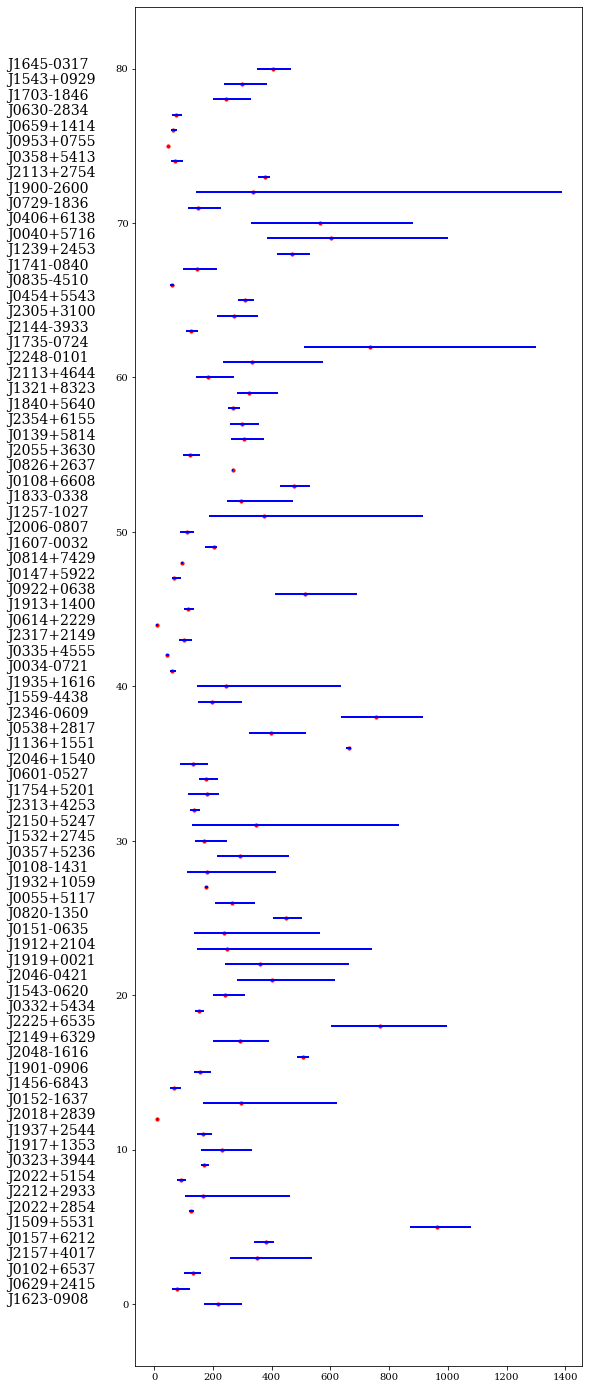

In [11]:
sm = 10
f, ax= plt.subplots(1, 1,  figsize=(8,25)) 

for i in range(len(vt_all)):
    pn = pulsar_names[i]
    y_pos = i
    ax.hlines(y=y_pos, xmin=fifths[i], xmax=ninety_fifths[i], linewidth=2, color='b')
    
    plt.scatter(meds[i], y_pos, s=sm, color='r')
    ax.text(-500, y_pos, pn, fontsize=14) # plot pulsar name

In [12]:
# div1 = int(len(vt_all)/4)
# div2 = 2*int(len(vt_all)/4)
# div3 = 3*int(len(vt_all)/4)
# divisions = [[0, div1], [div1, div2], [div2, div3], [div3, len(vt_all)]]

# 2 panel layout
div1 = int(len(vt_all)/2)
divisions = [[0, div1], [div1, len(vt_all)]]

In [25]:
for plot_range in divisions:
    print(range(plot_range[0], plot_range[1]))

range(0, 40)
range(40, 81)


In [29]:
for n, plot_range in enumerate(divisions):
    print(plot_range)

[0, 40]
[40, 81]


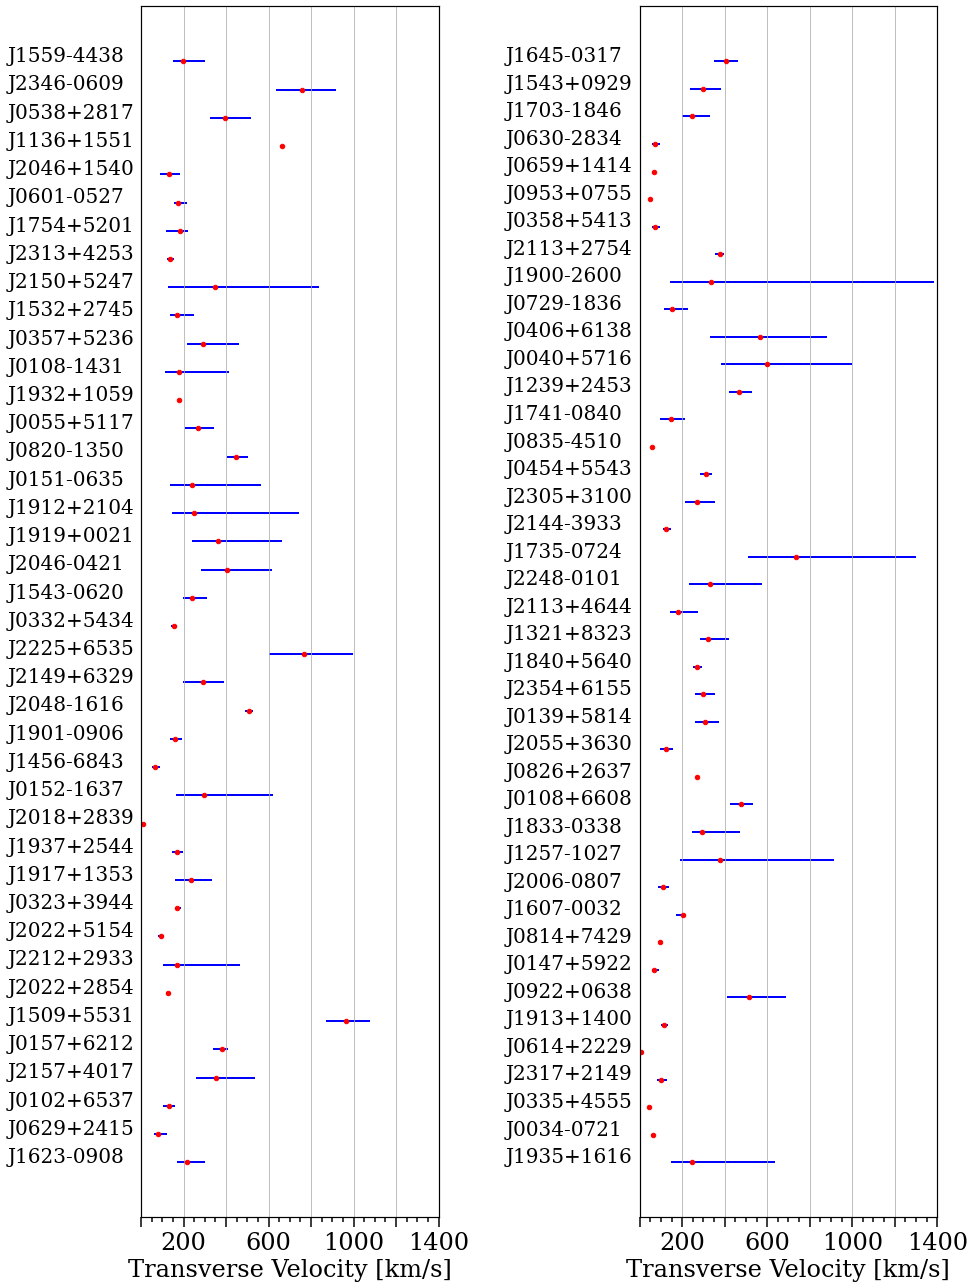

In [73]:
sm = 0.1
sl = 20
f1 = 20
f2 = 24
f, (ax)= plt.subplots(1, 2,  figsize=(14,18)) 

for n, plot_range in enumerate(divisions):
    for i in range(plot_range[0], plot_range[1]):
        pd = vt_all[i]
        pn = pulsar_names[i]
        y_pos = i
        ax[n].text(-630, y_pos, pn, fontsize=f1) # plot pulsar name

        ax[n].hlines(y=y_pos, xmin=np.percentile(pd, 5), xmax=np.percentile(pd, 95), linewidth=2, color='b', zorder=1)

        ax[n].scatter(np.median(pd), y_pos, s=sl, color='r', zorder=2)

    ax[n].get_yaxis().set_visible(False)   

    layoutAxes(ax=ax[n], nameX='Transverse Velocity [km/s]',\
                   nameY='', fontsize=f2)
    
    ax[n].grid(axis='x')
    for label in ax[n].xaxis.get_ticklabels()[::2]:
        label.set_visible(False)
    ax[n].set_xlim(0,1400)

plt.tight_layout()
plt.savefig(f'plots/pulsar_data_{len(divisions)}_panel.png', dpi=300)
plt.show()

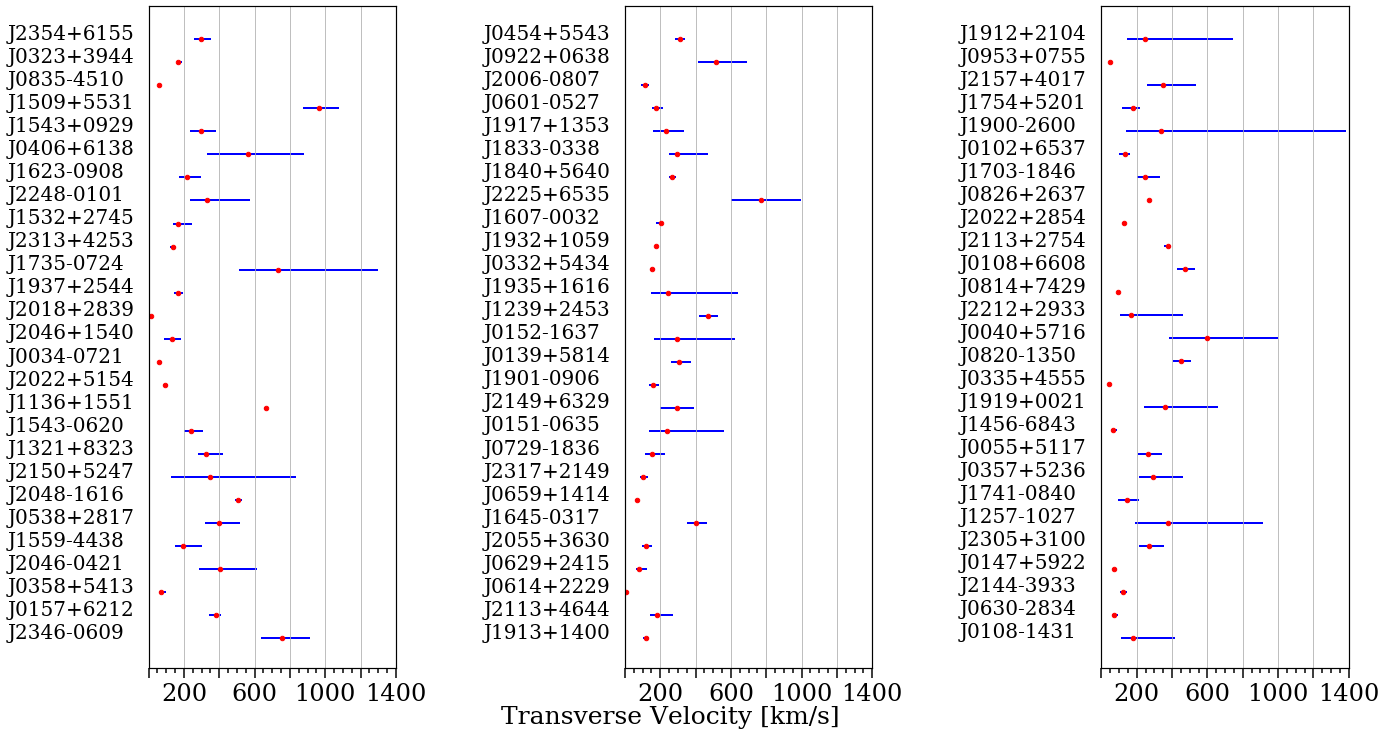

In [40]:
div1 = int(len(vt_all)/3)
div2 = 2*int(len(vt_all)/3)
divisions = [[0, div1], [div1, div2], [div2, len(vt_all)]]

sm = 0.1
sl = 20
f1 = 20
f2 = 24
f, (ax)= plt.subplots(1, 3,  figsize=(20,10), sharex=True) 

for n, plot_range in enumerate(divisions):
    for i in range(plot_range[0], plot_range[1]):
        pd = vt_all[i]
        pn = pulsar_names[i]
        y_pos = i
        ax[n].text(-800, y_pos, pn, fontsize=f1) # plot pulsar names

        ax[n].hlines(y=y_pos, xmin=np.percentile(pd, 5), xmax=np.percentile(pd, 95), linewidth=2, color='b', zorder=1)

        ax[n].scatter(np.median(pd), y_pos, s=sl, color='r', zorder=2)

    ax[n].get_yaxis().set_visible(False)   

    layoutAxes(ax=ax[n], nameX='',\
                   nameY='', fontsize=f2)
    
    ax[n].grid(axis='x')
    for label in ax[n].xaxis.get_ticklabels()[::2]:
        label.set_visible(False)
    ax[n].set_xlim(0,1400)

f.text(0.5, -0.01, 'Transverse Velocity [km/s]', ha='center', fontsize=25)
plt.tight_layout()

plt.show()